### kaggle 사용을 위한 준비단계

In [2]:
pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [4]:
#colab에서 g란 이름으로 구글드라이브의 root를 MOUNT
from google.colab import drive
drive.mount('/content/g')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/g


In [5]:
!mkdir -p ~/.kaggle
!cp "/content/g/My Drive/kaggle/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### 데이터 다운로드

In [6]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 22.9MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.79MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 29.4MB/s]


### titanic 데이터 구조 훑어보기

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [8]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


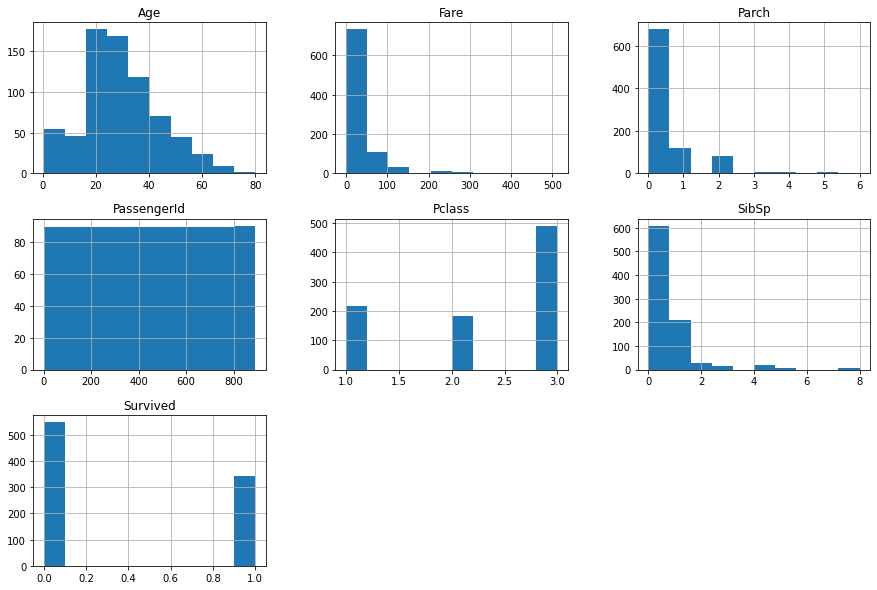

In [11]:
df_train.hist(figsize=(15,10))
plt.show()

titanic 데이터는 **891행**으로 이루어져 있는 **train 데이터**와 **418행**으로 이루어져 있는 **test 데이터**를 가지고 있다.  
  
**<center>데이터 구성</center>**

|변수|설명|비고|데이터유형|구분|
|------|---|---|---|---|
|PassengerId|승객번호||int|
|Survived|생존여부|0 = No, 1 = Yes|int|범주형|
|Pclass|객실등급|1 = 1등급, 2 = 2등급, 3 = 3등급|int|범주형|
|Name|승객이름||object||
|Sex|성별|male, female|object|범주형|
|Age|나이||float||
|SibSp|함께 탑승한 형제와 배우자의 수|형제수 + 배우자수|int||
|Parch|함께 탑승한 부모와 아이의 수|부모수 + 자녀수|int||
|Ticket|티겟 번호||object||
|Fare|탑승 요금||float||
|Cabin|객실 번호|공백도 많고 정확한 기준을 알 수 없다|object||
|Embarked|탑승 항구|C=Cherbourg, Q=Queenstown, S=Southampton|object|범주형|

### 데이터 탐색
```corr()``` 메서드를 통해 특성 간 표준 상관계수 알아보기

In [12]:
corr_matrix = df_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

생존여부와 다른 특성 사이의 상관 관계의 크기를 알아본 결과 PassengerId 는 0에 가까우므로 상관 관계가 없다는 것을 알 수 있다.  
Fare와 Pclass를 보면 각각 1과 -1에 가깝지는 않아 강한 상관관계를 가진다고 말하기는 어렵지만 그래도 다른 특성에 비해 생존여부와 어느정도 상관관계를 가지고 있음을 알 수 있다.  

In [13]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age와 Fare의 mean값을 보면 각각 29와 32로 다른 특성들에 비해 큰 값을 가지고 있다.  
숫자 특성들의 크기가 많이 다르기 때문에 나중에 특성 스케일링을 진행하도록 하였다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e5d7b57b8>,
      dtype=object)

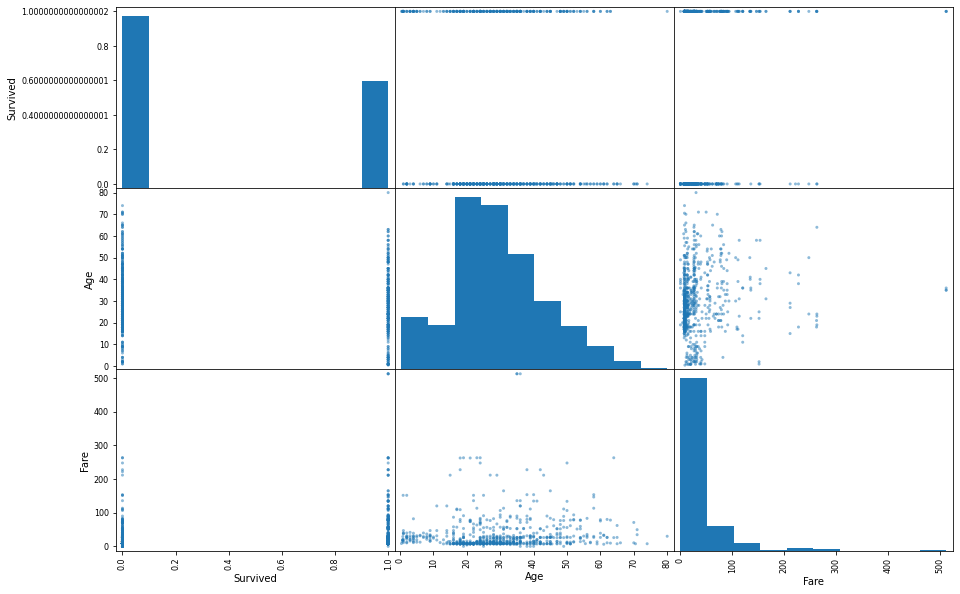

In [14]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Age", "Fare"]
scatter_matrix(df_train[attributes], figsize=(15, 10))

또한 상관관계가 존재한다고 판단한 Age와 Fare의 산점도 행렬을 그려보니 (Pclass는 범주형 이라 일단 제외)  
Fare에서 유독 튀는 데이터(400 이상)가 존재하는게 보여 **이상치 처리**를 진행하도록 하였다.

### 데이터 정제
**필요 없는 열 삭제**  
생존여부를 판단하는데에 있어 필요하지 않다고 생각하는 열을 삭제하기로 하였다.  
  
PassengerId = 인덱스처럼 1부터 순차적으로 증가하는 값을 가지고 있어 생존여부에 관여하지 않는다.  
Name = 탑승자의 이름은 생존여부와 관련이 없다.  
Ticket = 탑승자의 티켓 번호는 생존여부와 관련이 없다.
Cabin = 객실 번호는 공백이 많기 때문에 대체하기 어려워 삭제를 진행하였다.

In [15]:
del df_train['PassengerId']
del df_train['Name']
del df_train['Ticket']
del df_train['Cabin']
del df_test['Name']
del df_test['Ticket']
del df_test['Cabin']

#### 결측치 처리

In [16]:
df_train.groupby('Embarked').count()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,168,168,168,130,168,168,168
Q,77,77,77,28,77,77,77
S,644,644,644,554,644,644,644


In [17]:
df_train['Age'].mean()

29.69911764705882

In [18]:
df_test['Age'].mean()

30.272590361445783

Embarked 열에서 최다 빈도는 S 이므로 결측치를 일괄적으로 S로 채우기로 하였고,  
Age 열은 나이의 평균값으로 결측치를 채우기로 하였다.  
train 데이터 Age 평균 : 29.699117647058763  
test 데이터 Age 평균 : 30.272590361445815

In [19]:
df_train['Embarked']=df_train['Embarked'].fillna('S')
df_train['Age']=df_train['Age'].fillna(df_train['Age'].mean())

In [20]:
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mean())
df_test['Age']=df_test['Age'].fillna(df_test['Age'].mean())

#### 이상치 처리

In [21]:
df_train = df_train[(df_train["Fare"] < 400)]

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  888 non-null    int64  
 1   Pclass    888 non-null    int64  
 2   Sex       888 non-null    object 
 3   Age       888 non-null    float64
 4   SibSp     888 non-null    int64  
 5   Parch     888 non-null    int64  
 6   Fare      888 non-null    float64
 7   Embarked  888 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.4+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e5dfd2f60>,
      dtype=object)

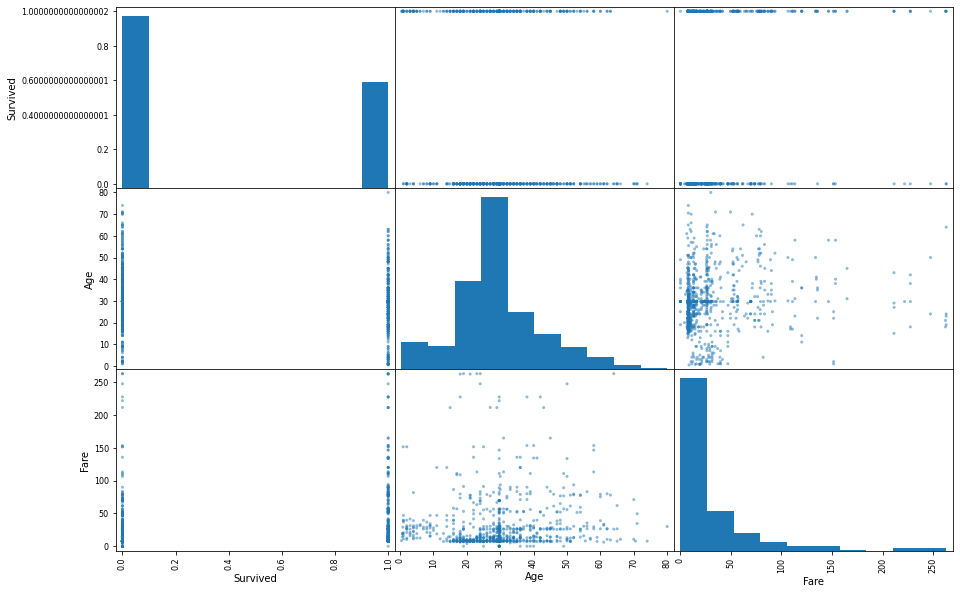

In [23]:
attributes = ["Survived", "Age", "Fare"]
scatter_matrix(df_train[attributes], figsize=(15, 10))

이상치 제거 결과 891행에서 888행으로 3개 행이 제거되었다.

#### 특성 스케일링

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_train['Age'] = StandardScaler().fit_transform(df_train['Age'].values.reshape(-1, 1))
df_train['Fare'] = StandardScaler().fit_transform(df_train['Fare'].values.reshape(-1, 1))
df_train['SibSp'] = StandardScaler().fit_transform(df_train['SibSp'].values.reshape(-1, 1))
df_train['Parch'] = StandardScaler().fit_transform(df_train['Parch'].values.reshape(-1, 1))

df_test['Age'] = StandardScaler().fit_transform(df_test['Age'].values.reshape(-1, 1))
df_test['Fare'] = StandardScaler().fit_transform(df_test['Fare'].values.reshape(-1, 1))
df_test['SibSp'] = StandardScaler().fit_transform(df_test['SibSp'].values.reshape(-1, 1))
df_test['Parch'] = StandardScaler().fit_transform(df_test['Parch'].values.reshape(-1, 1))

In [25]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,888.000000,888.000000,8.880000e+02,8.880000e+02,8.880000e+02,8.880000e+02
mean,0.381757,2.313063,2.921524e-16,3.363176e-16,1.500301e-18,1.108973e-16
std,0.486091,0.834007,1.000564e+00,1.000564e+00,1.000564e+00,1.000564e+00
min,0.000000,1.000000,-2.248616e+00,-4.755270e-01,-4.733534e-01,-7.431301e-01
25%,0.000000,2.000000,-5.902088e-01,-4.755270e-01,-4.733534e-01,-5.512664e-01
50%,0.000000,3.000000,1.462788e-03,-4.755270e-01,-4.733534e-01,-3.919008e-01
75%,1.000000,3.000000,4.088317e-01,4.306275e-01,-4.733534e-01,4.609266e-03
max,1.000000,3.000000,3.867049e+00,6.773709e+00,6.966253e+00,5.647628e+00


#### 범주형 특성 처리
int 및 object 타입으로 되어 있던 범주형 열인 Sex, Pclass, Embarked 열을 category 타입으로 변경

In [26]:
df_train['Sex']=df_train['Sex'].astype('category')
df_train['Pclass']=df_train['Pclass'].astype('category')
df_train['Embarked']=df_train['Embarked'].astype('category')
df_train = pd.get_dummies(df_train)

df_test['Sex']=df_test['Sex'].astype('category')
df_test['Pclass']=df_test['Pclass'].astype('category')
df_test['Embarked']=df_test['Embarked'].astype('category')
df_test = pd.get_dummies(df_test)

### 학습
**Survived** 열이 생존 여부를 나타내는 **label** 역할을 하기 때문에 답이 정해져 있는 **지도학습(supervised learning)** 알고리즘을 사용하였다.  
또한 생존 여부는 Yes 또는 No 2가지로 답을 할 수 있으므로 **classification** 문제이다.

### 훈련

In [27]:
from sklearn import model_selection
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn import linear_model

df_train의 라벨은 Survived로 0번 열에 해당.

*   훈련데이터 738개
*   검증데이터 150개

로 훈련 진행 후 최적의 알고리즘을 찾아낸 이후 전체 888개 데이터로 훈련한 모델을 통해 test 데이터 predict를 진행하기로 함



In [28]:
x_full = df_train.iloc[:,1:]
y_full = df_train.iloc[:,0]

x_full = x_full.values
y_full = y_full.values

x_data = df_train.iloc[:-150,1:]
y_data = df_train.iloc[:-150,0]

x_data = x_data.values
y_data = y_data.values

x_val = df_train.iloc[-150:,1:]
y_val = df_train.iloc[-150:,0]

x_val = x_val.values
y_val = y_val.values
print(x_full.shape)
print(x_data.shape)
print(x_val.shape)
print(y_data)

(888, 12)
(738, 12)
(150, 12)
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0
 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1
 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1

In [29]:
test_data = df_test.iloc[:,1:]
test_data = test_data.values
print(test_data.shape)

(418, 12)


##### SGD (Stochastic Gradient Descent)

In [30]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(x_data, y_data)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

##### RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(x_data, y_data)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### 모델 평가
교차 검증과 ROC로 모델 평가 진행

#### 교차 검증

In [32]:
from sklearn.model_selection import cross_val_score

print("sgd_clf(data): ", cross_val_score(sgd_clf, x_data, y_data, cv=3, scoring="accuracy"))
print("sgd_clf(val): ", cross_val_score(sgd_clf, x_val, y_val, cv=3, scoring="accuracy"))

print("forest(data): ", cross_val_score(forest, x_data, y_data, cv=3, scoring="accuracy"))
print("forest(val): ", cross_val_score(forest, x_val, y_val, cv=3, scoring="accuracy"))


sgd_clf(data):  [0.74796748 0.65447154 0.79674797]
sgd_clf(val):  [0.74 0.72 0.76]
forest(data):  [0.76422764 0.82926829 0.75609756]
forest(val):  [0.78 0.8  0.94]


#### ROC

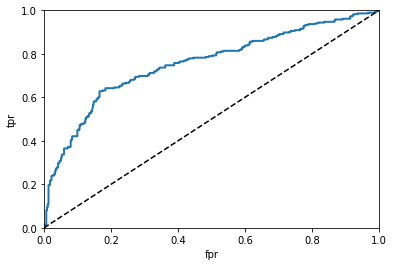

0.754811974749235

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')
  plt.axis([0,1,0,1])
  plt.xlabel('fpr')
  plt.ylabel('tpr')

y_scores = cross_val_predict(sgd_clf, x_data, y_data, cv=3, method="decision_function")
fpr, tpr, thresholds = roc_curve(y_data, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()

print("sgd_clf: ", roc_auc_score(y_data, y_scores))

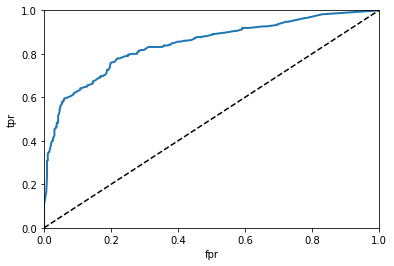

0.8427675148135239

In [44]:
y_scores = cross_val_predict(forest, x_data, y_data, cv=3, method="predict_proba")
fpr, tpr, thresholds = roc_curve(y_data, y_scores[:,1])
plot_roc_curve(fpr, tpr)
plt.show()
roc_auc_score(y_data, y_scores[:,1])

모델 평가 결과 교차 검증에서도 평균적으로 높은 정확도를 보이고, ROC AUC 점수도 가장 좋은 점수를 보이는 ```RandomForestClassifier``` 를 이 문제를 해결하기 위해 적합하다고 판단하였다.

### 모델 세부 튜닝
#### Grid Search

### RandomForestClassifier
n_estimators=100, criterion="gini", max_depth=None, min_samples_split=2,
                 min_samples_leaf=1,
                 min_weight_fraction_leaf=0.,
                 max_features="auto",
                 max_leaf_nodes=None,
                 min_impurity_decrease=0.,
                 min_impurity_split=None,
                 bootstrap=True,
                 oob_score=False,
                 n_jobs=None,
                 random_state=None,
                 verbose=0,
                 warm_start=False,
                 class_weight=None,
                 ccp_alpha=0.0,
                 max_samples=None

n_estimators	- 결정트리의 갯수를 지정
- Default = 10
- 무작정 트리 갯수를 늘리면 성능 좋아지는 것 대비 시간이 걸릴 수 있음  

min_samples_split	- 노드를 분할하기 위한 최소한의 샘플 데이터수
→ 과적합을 제어하는데 사용
- Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가  

min_samples_leaf	- 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- min_samples_split과 함께 과적합 제어 용도
- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요  

max_features	- 최적의 분할을 위해 고려할 최대 feature 개수
- Default = 'auto' (결정트리에서는 default가 none이었음)
- int형으로 지정 →피처 갯수 / float형으로 지정 →비중
- sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정
- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정  

max_depth	- 트리의 최대 깊이
- default = None
→ 완벽하게 클래스 값이 결정될 때 까지 분할
또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할
- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요  

max_leaf_nodes	리프노드의 최대 개수

In [131]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'n_estimators' : [5, 10, 100], 'max_depth' : [8, 10, 12, 16], 'min_samples_leaf' : [4, 8, 12], 'min_samples_split' : [16, 20, 24]}
]

forest_reg = RandomForestClassifier()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(x_data, y_data)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [132]:
max_depth_value = grid_search.best_params_['max_depth']
min_samples_leaf_value = grid_search.best_params_['min_samples_leaf']
min_samples_split_value = grid_search.best_params_['min_samples_split']
n_estimators_value_value = grid_search.best_params_['n_estimators']

In [133]:
max_depth_value, min_samples_leaf_value, min_samples_split_value, n_estimators_value

(12, 4, 16, 10)

In [134]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4417222973495122 {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 16, 'n_estimators': 10}
0.4417431082749365 {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 16, 'n_estimators': 100}
0.4355818732488726 {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 10}
0.44480205628733405 {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 100}
0.4493565500403507 {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 24, 'n_estimators': 10}
0.4402213252710353 {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 24, 'n_estimators': 100}
0.4478401108057195 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 10}
0.45086788894514684 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 100}
0.45384508713681176 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 10}
0.438673307833631 {'max_depth': 6, 'min_samples_leaf': 8,

In [135]:
forest = RandomForestClassifier(n_estimators = n_estimators_value, max_depth = max_depth_value, min_samples_leaf = min_samples_leaf_value, min_samples_split = min_samples_split_value)
forest.fit(x_data, y_data)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### 최종 모델

In [143]:
model = RandomForestClassifier(n_estimators = n_estimators_value, max_depth = max_depth_value, min_samples_leaf = min_samples_leaf_value, min_samples_split = min_samples_split_value)
model.fit(x_full, y_full)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### 테스트

In [95]:
y_predict = model.predict(test_data)

In [96]:
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [97]:
df_test

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0.334993,-0.499470,-0.400248,-0.498407,0,0,1,0,1,0,1,0
1,893,1.325530,0.616992,-0.400248,-0.513274,0,0,1,1,0,0,0,1
2,894,2.514175,-0.499470,-0.400248,-0.465088,0,1,0,0,1,0,1,0
3,895,-0.259330,-0.499470,-0.400248,-0.483466,0,0,1,0,1,0,0,1
4,896,-0.655545,0.616992,0.619896,-0.418471,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0.000000,-0.499470,-0.400248,-0.494448,0,0,1,0,1,0,0,1
414,1306,0.691586,-0.499470,-0.400248,1.313753,1,0,0,1,0,1,0,0
415,1307,0.651965,-0.499470,-0.400248,-0.508792,0,0,1,0,1,0,0,1
416,1308,0.000000,-0.499470,-0.400248,-0.494448,0,0,1,0,1,0,0,1


### kaggle 제출용 csv 파일 만들기

In [98]:
submission=pd.DataFrame({"PassengerId":df_test["PassengerId"], "Survived":y_predict})

In [99]:
submission.to_csv('submission.csv', index=False)